# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.
__

_Version 05.11.2021 in Python 3_

_Change log:_  


In [3]:
import os
from os import getcwd, listdir
import pandas as pd
import thot
from thot import ThotProject
from importlib import reload

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [4]:
# Initializes Thot project
db = ThotProject( dev_root = r'PLQY_results' )

In [5]:
samples = db.find_assets({'type' : 'absolute PL spectrum'})
for idx, sample in enumerate(samples):
    print(f'{idx:2}: {sample.name}')    

 0: glass-per-3,4,5_2_absolute PL spectrum
 1: glass-per-3,4,5_3_absolute PL spectrum
 2: glass-per-3,4,5_4_absolute PL spectrum
 3: glass-per-3,4,5_absolute PL spectrum
 4: htl-pero-345-c60_1_absolute PL spectrum
 5: htl-pero-345-c60_2_absolute PL spectrum
 6: htl-pero-345_1_absolute PL spectrum
 7: htl-pero-345_2_absolute PL spectrum
 8: htl-pero-345_3_absolute PL spectrum
 9: htl-pero-ani-c60_1_absolute PL spectrum
10: htl-pero-ani_1_absolute PL spectrum
11: htl-pero-ani_2_absolute PL spectrum
12: htl-pero-c60_1_absolute PL spectrum
13: htl-pero-c60_2_absolute PL spectrum
14: htl-pero-peai-c60_1_absolute PL spectrum
15: htl-pero-peai-c60_2_absolute PL spectrum
16: htl-pero-peai_1_absolute PL spectrum
17: htl-pero-peai_2_absolute PL spectrum
18: htl-pero_1_absolute PL spectrum
19: htl-pero_2_absolute PL spectrum


In [20]:
#Select samples and change order
do_this_step = True
if do_this_step:
    samples = db.find_assets({'type' : 'absolute PL spectrum'})
    order = [0, 1, 2, 3] #perovskite on glass
    #order = [6, 7, 8, 4, 5] #htl-per-345_without_and_with_C60
    #order = [18, 19, 6, 7] #htl-per without and with 345
    #order = [18, 19, 16, 17] #htl-per without and with PEAI
    #order = [18, 19, 16, 17, 10, 11, 6, 7, 8] #htl-per without and with surface passivation
    #order = [12, 13, 4, 5, 9, 14, 15] #htl-per-C60_without_and_with_interface_passivation
    #order= [3, 0, 6, 7, 8] #per-345_without_and_with_HTL
    
    samples_new = [samples[order[idx]] for idx in range(len(order))]
    for idx, sample in enumerate(samples_new):
        print(f'{idx:2}: {sample.name}')
    do_this_step = False
else:
    samples_new = samples

 0: glass-per-3,4,5_2_absolute PL spectrum
 1: glass-per-3,4,5_3_absolute PL spectrum
 2: glass-per-3,4,5_4_absolute PL spectrum
 3: glass-per-3,4,5_absolute PL spectrum


In [19]:
samples = samples_new
def load_spectrum(asset):
    #return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file), take_quants_and_units_from_file = True)
    return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file)+'.csv', take_quants_and_units_from_file = True)
sa = []
for idx, sample in enumerate(samples):
    sa.append(load_spectrum(sample))
    print(f'{idx:2}: {sample.name}')

 0: glass-per-3,4,5_2_absolute PL spectrum
 1: glass-per-3,4,5_3_absolute PL spectrum
 2: glass-per-3,4,5_4_absolute PL spectrum
 3: glass-per-3,4,5_absolute PL spectrum
 4: htl-pero-345-c60_1_absolute PL spectrum
 5: htl-pero-345-c60_2_absolute PL spectrum
 6: htl-pero-345_1_absolute PL spectrum
 7: htl-pero-345_2_absolute PL spectrum
 8: htl-pero-345_3_absolute PL spectrum
 9: htl-pero-ani-c60_1_absolute PL spectrum
10: htl-pero-ani_1_absolute PL spectrum
11: htl-pero-ani_2_absolute PL spectrum
12: htl-pero-c60_1_absolute PL spectrum
13: htl-pero-c60_2_absolute PL spectrum
14: htl-pero-peai-c60_1_absolute PL spectrum
15: htl-pero-peai-c60_2_absolute PL spectrum
16: htl-pero-peai_1_absolute PL spectrum
17: htl-pero-peai_2_absolute PL spectrum
18: htl-pero_1_absolute PL spectrum
19: htl-pero_2_absolute PL spectrum


glass-per-3,4,5_2: PLQY = 2.5e-01, PF = 4.3e+20 1/(s m2)
glass-per-3,4,5_3: PLQY = 1.8e-01, PF = 3.0e+20 1/(s m2)
glass-per-3,4,5_4: PLQY = 2.1e-01, PF = 3.6e+20 1/(s m2)
glass-per-3,4,5: PLQY = 2.3e-01, PF = 3.8e+20 1/(s m2)
htl-pero-345-c60_1: PLQY = 7.3e-03, PF = 1.2e+19 1/(s m2)
htl-pero-345-c60_2: PLQY = 7.3e-03, PF = 1.2e+19 1/(s m2)
htl-pero-345_1: PLQY = 1.5e-01, PF = 2.5e+20 1/(s m2)
htl-pero-345_2: PLQY = 1.2e-01, PF = 2.1e+20 1/(s m2)
htl-pero-345_3: PLQY = 1.5e-01, PF = 2.5e+20 1/(s m2)
htl-pero-ani-c60_1: PLQY = 2.8e-03, PF = 4.7e+18 1/(s m2)
htl-pero-ani_1: PLQY = 7.0e-02, PF = 1.2e+20 1/(s m2)
htl-pero-ani_2: PLQY = 5.4e-02, PF = 9.2e+19 1/(s m2)
htl-pero-c60_1: PLQY = 2.6e-03, PF = 4.4e+18 1/(s m2)
htl-pero-c60_2: PLQY = 3.3e-03, PF = 5.5e+18 1/(s m2)
htl-pero-peai-c60_1: PLQY = 4.6e-03, PF = 7.8e+18 1/(s m2)
htl-pero-peai-c60_2: PLQY = 3.1e-03, PF = 5.3e+18 1/(s m2)
htl-pero-peai_1: PLQY = 1.4e-01, PF = 2.4e+20 1/(s m2)
htl-pero-peai_2: PLQY = 1.3e-01, PF = 2.2e+20 1/(

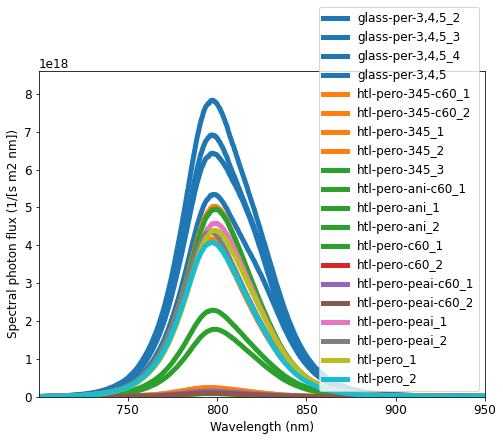

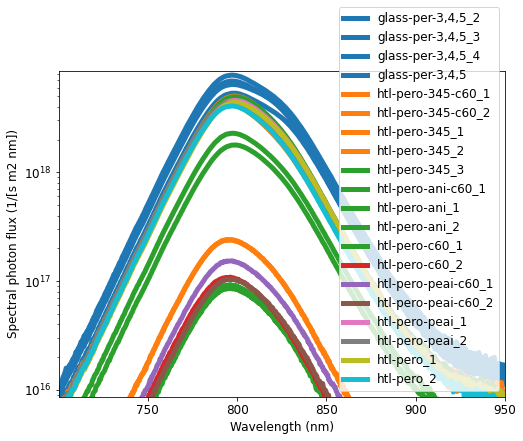

In [11]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{s_name}: PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

change_plotstyle = True
if change_plotstyle:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[6].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[7].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[8].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[9].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[10].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[11].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[12].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[13].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')

#allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
all_graph = allPL.plot(bottom = 0, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
allPL.plot(yscale = 'log', divisor = 1e3, plotstyle = 'individual', figsize = (8, 6))
#lqy.add_graph(db, 'all_htl-per-345_without_and_with_C60.png', all_graph)
lqy.add_graph(db, 'all_absolute_PL_spectra_.png', all_graph)
del all_graph


In [12]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    #print(sample.name.split('_absolute')[0])
    sm = sample.metadata
    #print(sm)
    names.append(sample.name.split('_absolute')[0])
    A_arr.append(sm['A'])
    PLQY_arr.append(sm['PLQY'])
    peak_arr.append(sm['Peak'])
    Eg_arr.append(sm['Eg'])
    Vsq_arr.append(sm['Vsq'])
    dV_arr.append(sm['dV'])
    QFLS_arr.append(sm['QFLS'])
    adj_fac_arr.append(sm['adj_fac'])
    fs_absint_fac_arr.append(sm['fs_absint_factor'])    

In [13]:
# Save PLQY data
do_this_step = True

if do_this_step:

    df = pd.DataFrame({'Sample' : names, 'A' : A_arr, 'PLQY' : PLQY_arr, 'PL_peak (nm)' : peak_arr, 'Eg (eV)' : Eg_arr, 'Vsq (V)' : Vsq_arr, 'delta V (V)': dV_arr, 'QFLS/q (V)' : QFLS_arr, 'fs-inb adjustment factor' : adj_fac_arr, 'fs-absolute intensity factor' : fs_absint_fac_arr})

    directory = os.path.dirname(samples[0].file) 
    FN = 'PLQY.csv'
    #if save_ok(join(directory, FN)):
    #    df.to_csv(join(directory, FN), header = True, index = False)
        
    asset_prop = dict(name = 'csv_'+FN, type = 'csv', file = FN)
    asset_filepath = db.add_asset(asset_prop)
    df.to_csv(asset_filepath, header = True, index = False)
    do_this_step = False

In [17]:
#Save all data in exchange folder
exch_dir = os.path.join(db.root, 'exchange')

try:
    os.makedirs(exch_dir, exist_ok = True)
except OSError as error:
    print("Directory '%s' can not be created" % exch_dir)
    
import shutil

# PLQY.csv
src = asset_filepath
FN = os.path.basename(asset_filepath)
dst =  os.path.join(exch_dir, FN)
shutil.copyfile(src, dst)

# absolute PL spectra
for idx, sample in enumerate(samples):
    src = sample.file
    FN = os.path.basename(sample.file)
    dst =  os.path.join(exch_dir, FN)
    shutil.copyfile(src, dst)